<a href="https://colab.research.google.com/github/emiliopugnaloni/Crimenes-Caba/blob/main/2%20-%20SIG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rarfile
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 53.0 MB/s eta 0:00:00


## **Librerias**

In [ ]:
import pandas as pd
import os
import zipfile
import rarfile
import geopandas as gpd # to work with spatial data
import contextily as ctx # to plot
import matplotlib.pyplot as plt

## **Datasets**

In [ ]:
files = [
    'comisarias-policia-de-la-ciudad-zip.zip',
    'departamentos-comisarias-comunales.zip',
    'divisiones-comisarias-vecinales.zip',
    'barrios.zip',
    'comunas.zip'
]
extract_paths = [
    'comisarias-policia-de-la-ciudad',
    'departamentos-comisarias-comunales',
    'divisiones-comisarias-vecinales',
    'barrios',
    'comunas'
]

for file, extract_path in zip(files, extract_paths):
    if file.endswith('.rar') or "RAR archive data" in os.popen(f'file {file}').read():
        with rarfile.RarFile(file) as rf:
            rf.extractall(extract_path)
            print(f"Extracted {file} as a RAR file.")
    elif file.endswith('.zip'):
        with zipfile.ZipFile(file, 'r') as zf:
            zf.extractall(extract_path)
            print(f"Extracted {file} as a ZIP file.")
    else:
        print(f"Unsupported file type: {file}")


Extracted comisarias-policia-de-la-ciudad-zip.zip as a RAR file.
Extracted departamentos-comisarias-comunales.zip as a ZIP file.
Extracted divisiones-comisarias-vecinales.zip as a ZIP file.
Extracted barrios.zip as a ZIP file.
Extracted comunas.zip as a ZIP file.


### **Comisarias Policia**

In [ ]:
shapefile_path  = os.path.join(extract_paths[0], "comisarias_policia_de_la_ciudad.shp")
comisarias_gdf = gpd.read_file(shapefile_path)

print(f"Number of rows: {len(comisarias_gdf)}")
comisarias_gdf.head(2)


Number of rows: 49


id                 nombre nom_2 nom_3 Designa Dependenci     Tipo    calle  \
0   1  Comisaría Vecinal 1-D  None  None     C1D   División  Vecinal  Lavalle   
1  37  Comisaría Vecinal 5-B  None  None     C5B   División  Vecinal    Muñiz   

   altura calle2    direccion             telefonos observacio observac_1  \
0     451   None  LAVALLE 451        4322-8033/8221       None       None   
1    1250   None   MUÑIZ 1250  4922-1229 /4922-3333       None       None   

        BARRIO  COMUNAS               nom_mapa      nom_ante  \
0  SAN NICOLAS        1  Comisaría Vecinal 1-D   Comisaría 1   
1        BOEDO        5  Comisaría Vecinal 5-B  Comisaría 10   

                        geometry  
0  POINT (108260.566 103031.931)  
1  POINT (103518.808 100069.127)

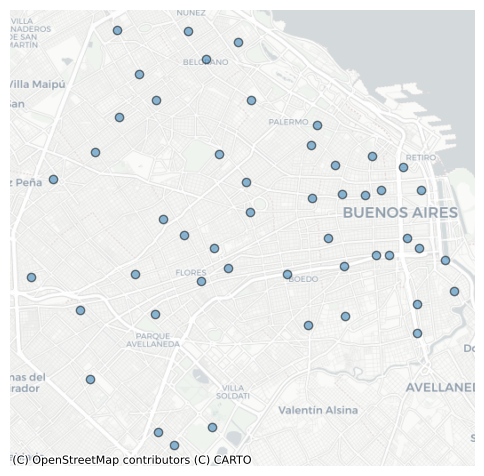

In [ ]:
# Reproject the data to Web Mercator (EPSG:3857)
comisarias_gdf = comisarias_gdf.to_crs(epsg=3857)

# Plot with a basemap
ax = comisarias_gdf.plot(figsize=(6, 6), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # Add a basemap
ax.set_axis_off()  # Remove axes


### **Departamentos Comisarias Comunales**

In [ ]:
shapefile_path  = os.path.join(extract_paths[1], "departamentos-comisarias-comunales.shp")
dtos_comisarias_comunales_gdf = gpd.read_file(shapefile_path)

print(f"Number of rows: {len(dtos_comisarias_comunales_gdf)}")
dtos_comisarias_comunales_gdf.head(2)

Number of rows: 15


Id               Nombre  Comuna                     Objeto  \
0   1  Comisaría Comunal 1       1  Zona de Comisaría Comunal   
1   4  Comisaría Comunal 4       4  Zona de Comisaría Comunal   

                                            geometry  
0  MULTIPOLYGON (((108008.681 105714.067, 108064....  
1  MULTIPOLYGON (((109859.916 100111.008, 109862....

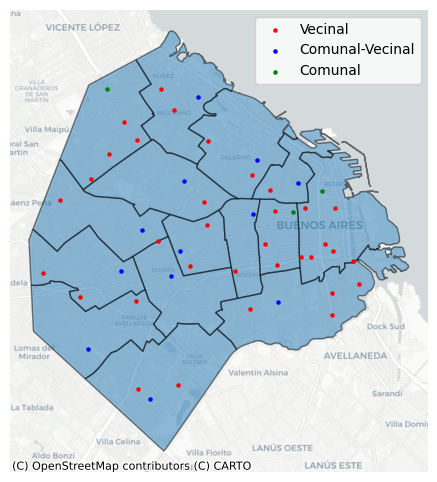

In [ ]:
# Create a plot with a basemap
fig, ax = plt.subplots(figsize=(6, 6))

# Reproject the data to Web Mercator (EPSG:3857)
comisarias_gdf = comisarias_gdf.to_crs(epsg=3857)
dtos_comisarias_comunales_gdf = dtos_comisarias_comunales_gdf.to_crs(epsg=3857)


# Plot the shapes (dtos_comisarias_comunales_gdf) with the basemap
dtos_comisarias_comunales_gdf.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # Add a basemap

# Define a colormap based on the 'Tipo' column
colormap = {'Vecinal': 'red', 'Comunal-Vecinal': 'blue', 'Comunal': 'green'}

# Plot the points with different colors based on 'Tipo'
for tipo, color in colormap.items():
    tipo_gdf = comisarias_gdf[comisarias_gdf['Tipo'] == tipo]
    tipo_gdf.plot(ax=ax, color=color, markersize=5, label=tipo)

ax.legend()
ax.set_axis_off()
plt.show()

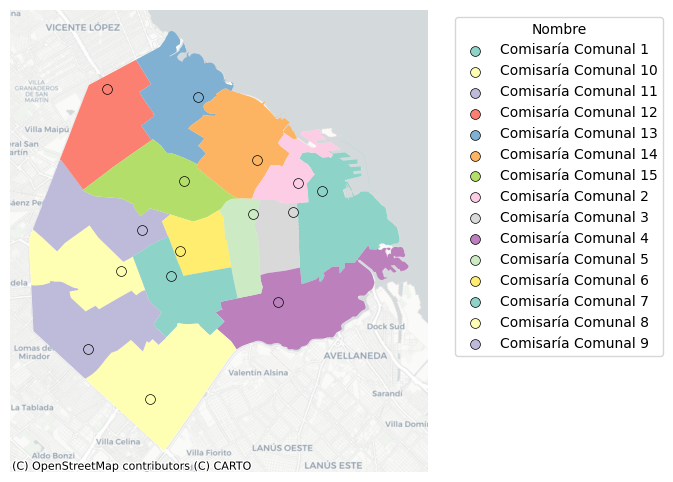

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx

# Create a plot with a basemap
fig, ax = plt.subplots(figsize=(6, 6))

# Comisarias Comunales GDF
comisarias_comunales_gdf = comisarias_gdf[comisarias_gdf.nombre.isin(dtos_comisarias_comunales_gdf.Nombre.values)]

# Reproject the data to Web Mercator (EPSG:3857)
comisarias_comunales_gdf = comisarias_comunales_gdf.sort_values('nombre').to_crs(epsg=3857)
dtos_comisarias_comunales_gdf = dtos_comisarias_comunales_gdf.sort_values('Nombre').to_crs(epsg=3857)

# Palette
n_colors = len(comisarias_comunales_gdf)  # Ensure we have enough colors for both datasets
palette = sns.color_palette("Set3", n_colors=n_colors)

# Plot the polygons (dtos_comisarias_comunales_gdf) with a unique color
for i in range(len(dtos_comisarias_comunales_gdf)):
    id_gdf = dtos_comisarias_comunales_gdf.iloc[[i]]  # Create a GeoDataFrame with just one row
    color = palette[i]
    id_gdf.plot(ax=ax, color=color, markersize=5)  # Assign label for legend

# Plot the points from comisarias_gdf, color them by index (same colors)
for i in range(len(comisarias_comunales_gdf)):
    point_gdf = comisarias_comunales_gdf.iloc[[i]]  # Create a GeoDataFrame with just one row (point)
    color = palette[i]  # Get the same color as the corresponding index in dtos_comisarias_comunales_gdf
    point_gdf.plot(ax=ax, color=color, markersize=50, marker='o', edgecolor='black', linewidth=0.5, label=point_gdf.nombre.iloc[0])  # Avoid repeating labels

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # Add a basemap

# Show the plot
ax.set_axis_off()  # Hide axes
ax.legend(title="Nombre", bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend outside the plot
plt.show()


### **Diviciones Comisarias Vecinales**

In [ ]:
shapefile_path  = os.path.join(extract_paths[2], "divisiones_comisarias_vecinales_WGS84.shp")
div_comisarias_vecinales_gdf = gpd.read_file(shapefile_path)

print(f"Number of rows: {len(div_comisarias_vecinales_gdf)}")
div_comisarias_vecinales_gdf.head(2)

Number of rows: 45


fid_1  Id                Nombre  Comuna           departamen division  \
0    1.0   1  Comisaria Vecinal 1B       1  Comisaria Comunal 1       1B   
1    2.0   2  Comisaria Vecinal 1C       1  Comisaria Comunal 1       1C   

                      objeto C_Comunal C_Vecinal  Area  \
0  Zona de Comisaria Vecinal     CC-01    CV-01B  ESTE   
1  Zona de Comisaria Vecinal     CC-01    CV-01C  ESTE   

                                            geometry  
0  POLYGON ((-58.38191 -34.59881, -58.38189 -34.5...  
1  POLYGON ((-58.36695 -34.61771, -58.36632 -34.6...

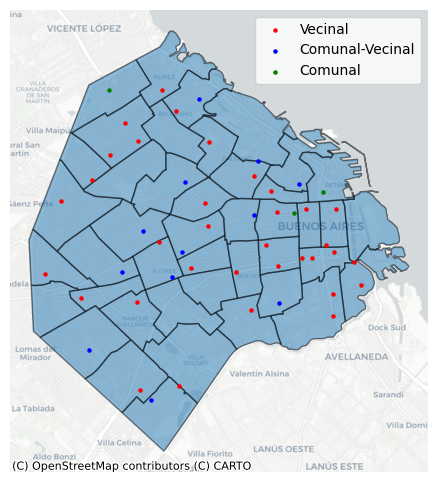

In [ ]:
# Create a plot with a basemap
fig, ax = plt.subplots(figsize=(6, 6))

# Reproject the data to Web Mercator (EPSG:3857)
comisarias_gdf = comisarias_gdf.to_crs(epsg=3857)
div_comisarias_vecinales_gdf = div_comisarias_vecinales_gdf.to_crs(epsg=3857)


# Plot the shapes (div_comisarias_vecinales_gdf) with the basemap
div_comisarias_vecinales_gdf.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # Add a basemap

# Define a colormap based on the 'Tipo' column
colormap = {'Vecinal': 'red', 'Comunal-Vecinal': 'blue', 'Comunal': 'green'}

# Plot the points with different colors based on 'Tipo'
for tipo, color in colormap.items():
    tipo_gdf = comisarias_gdf[comisarias_gdf['Tipo'] == tipo]
    tipo_gdf.plot(ax=ax, color=color, markersize=5, label=tipo)

ax.legend()
ax.set_axis_off()
plt.show()

### **Barrios**

In [ ]:
shapefile_path  = os.path.join(extract_paths[3], "barrios.shp")
barrios_gpd = gpd.read_file(shapefile_path)

print(f"Number of rows: {len(barrios_gpd)}")
barrios_gpd.head(2)

Number of rows: 48


id  objeto     nombre  comuna  perimetro_  area_metro  \
0   1  BARRIO  AGRONOMIA      15     6556.17  2122169.34   
1   2  BARRIO    ALMAGRO       5     8537.90  4050752.25   

                                            geometry  
0  POLYGON ((-58.47589 -34.59172, -58.47598 -34.5...  
1  POLYGON ((-58.416 -34.59785, -58.41569 -34.597...

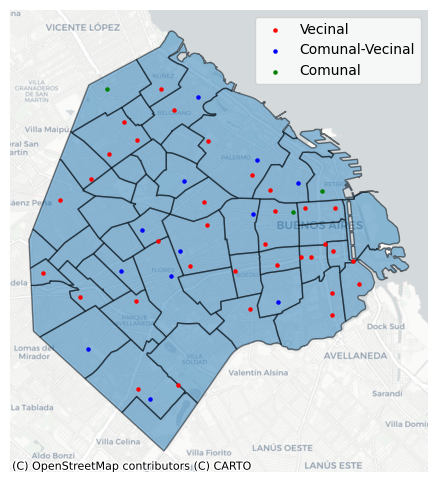

In [ ]:
# Create a plot with a basemap
fig, ax = plt.subplots(figsize=(6, 6))

# Reproject the data to Web Mercator (EPSG:3857)
comisarias_gdf = comisarias_gdf.to_crs(epsg=3857)
barrios_gpd = barrios_gpd.to_crs(epsg=3857)


# Plot the shapes (barrios) with the basemap
barrios_gpd.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # Add a basemap

# Define a colormap based on the 'Tipo' column
colormap = {'Vecinal': 'red', 'Comunal-Vecinal': 'blue', 'Comunal': 'green'}

# Plot the points with different colors based on 'Tipo'
for tipo, color in colormap.items():
    tipo_gdf = comisarias_gdf[comisarias_gdf['Tipo'] == tipo]
    tipo_gdf.plot(ax=ax, color=color, markersize=5, label=tipo)

ax.legend()
ax.set_axis_off()
plt.show()

### **Comunas**

In [ ]:
shapefile_path  = os.path.join(extract_paths[4], "comunas.shp")
comunas_gpd = gpd.read_file(shapefile_path)

print(f"Number of rows: {len(comunas_gpd)}")
comunas_gpd.head(2)

Number of rows: 15


id  objeto  comuna                                            barrios  \
0   1  COMUNA       1  CONSTITUCION, MONSERRAT, RETIRO, PUERTO MADERO...   
1   2  COMUNA       2                                           RECOLETA   

   perimetro         area                                           geometry  
0   36011.96  17784744.41  MULTIPOLYGON (((-58.36855 -34.57365, -58.36852...  
1   21450.47   6317725.62  POLYGON ((-58.38001 -34.57002, -58.38003 -34.5...

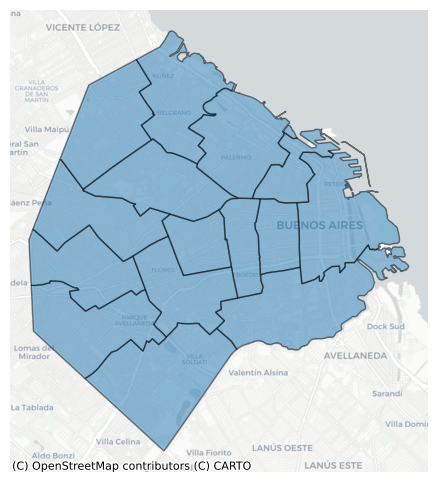

In [ ]:
# Create a plot with a basemap
fig, ax = plt.subplots(figsize=(6, 6))

# Reproject the data to Web Mercator (EPSG:3857)
comisarias_gdf = comisarias_gdf.to_crs(epsg=3857)
comunas_gpd = comunas_gpd.to_crs(epsg=3857)

# Plot the shapes (barrios) with the basemap
comunas_gpd.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # Add a basemap


#ax.legend()
ax.set_axis_off()
plt.show()

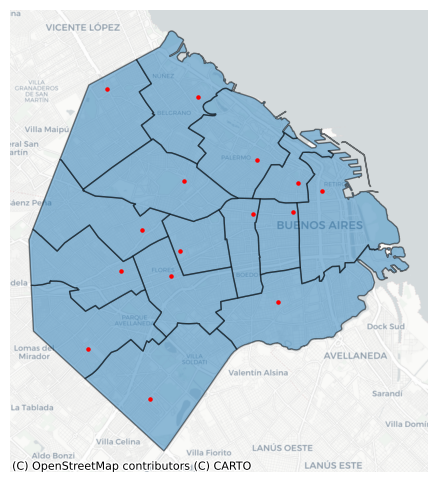

In [ ]:
# Create a plot with a basemap
fig, ax = plt.subplots(figsize=(6, 6))

# Reproject the data to Web Mercator (EPSG:3857)
comisarias_gdf = comisarias_gdf.to_crs(epsg=3857)
comunas_gpd = comunas_gpd.to_crs(epsg=3857)


# Plot the shapes (barrios) with the basemap
comunas_gpd.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # Add a basemap

# Define a colormap based on the 'Tipo' column
colormap = {'Vecinal': 'red', 'Comunal-Vecinal': 'blue', 'Comunal': 'green'}
colormap = {'Vecinal': 'black', 'Comunal-Vecinal': 'red', 'Comunal': 'red'}
colormap = {'Comunal-Vecinal': 'red', 'Comunal': 'red'}


# Plot the points with different colors based on 'Tipo'
for tipo, color in colormap.items():
    tipo_gdf = comisarias_gdf[comisarias_gdf['Tipo'] == tipo]
    tipo_gdf.plot(ax=ax, color=color, markersize=5, label=tipo)



#ax.legend()
ax.set_axis_off()
plt.show()

## **Mapa Comunas + Comisarias**

In [ ]:
# Comunas File

shapefile_path  = os.path.join(extract_paths[4], "comunas.shp")
comunas_gpd = gpd.read_file(shapefile_path)
comunas_gpd['Nombre'] = "Comuna " + comunas_gpd['comuna'].astype('str')
comunas_gpd = comunas_gpd[['Nombre', 'comuna', 'geometry']]
comunas_gpd.columns = ['Nombre', 'Comuna', 'geometry']
comunas_gpd.head(2)

Nombre  Comuna                                           geometry
0  Comuna 1       1  MULTIPOLYGON (((-58.36855 -34.57365, -58.36852...
1  Comuna 2       2  POLYGON ((-58.38001 -34.57002, -58.38003 -34.5...

In [ ]:
# Comisarias Comunales File

shapefile_path  = os.path.join(extract_paths[0], "comisarias_policia_de_la_ciudad.shp")
comisarias_comunales = gpd.read_file(shapefile_path)
comisarias_comunales = comisarias_comunales[comisarias_comunales.Tipo.isin(['Comunal-Vecinal', 'Comunal'])]
comisarias_comunales = comisarias_comunales[['nombre', 'Tipo', 'BARRIO', 'COMUNAS', 'geometry']]
comisarias_comunales.columns = ['Nombre', 'Tipo', 'Barrio', 'Comuna', 'geometry']
comisarias_comunales.head(2)

print(f"Number of rows: {len(comisarias_comunales)}")
comisarias_comunales.head(2)

Number of rows: 15


Nombre             Tipo     Barrio  Comuna  \
4  Comisaría Comunal 6  Comunal-Vecinal  CABALLITO       6   
5  Comisaría Comunal 1          Comunal     RETIRO       1   

                        geometry  
4  POINT (100924.299 100985.911)  
5   POINT (107625.246 103838.21)

In [ ]:
# Assign a color to each COMUNA
len_comunas = len(comisarias_comunales.Comuna.sort_values().unique())
colormap = plt.cm.get_cmap('tab20', len_comunas)
color_comuna = {i+1: colormap(i) for i in range(len_comunas)}


<ipython-input-88-a18d7839b28e>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', len_comunas)


In [ ]:
comisarias_comunales[comisarias_comunales.Comuna == 6].Nombre.values[0]

'Comisaría Comunal 6'

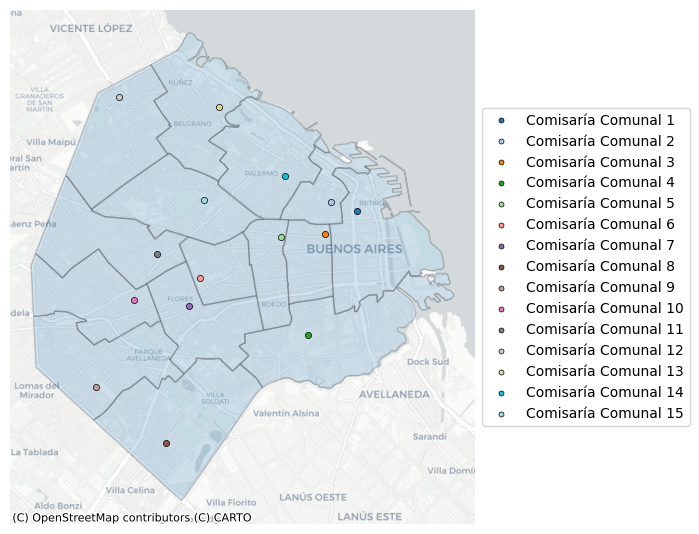

In [ ]:
# Create a plot with a basemap
fig, ax = plt.subplots(figsize=(6, 8))

# Reproject the data to Web Mercator (EPSG:3857)
comisarias_comunales = comisarias_comunales.to_crs(epsg=3857)
comunas_gpd = comunas_gpd.to_crs(epsg=3857)

# Plot the shapes (comunas) with the basemap
comunas_gpd.plot(ax=ax, alpha=0.2, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Plot the points with different colors based on 'Tipo'
for comuna, color in color_comuna.items():
    comisaria_comunal = comisarias_comunales[comisarias_comunales['Comuna'] == comuna]
    comisaria_comunal.plot(ax=ax, color=color, marker='o', edgecolor='black', linewidth=0.5, markersize=20, label= comisarias_comunales[comisarias_comunales.Comuna == comuna].Nombre.values[0])

ax.set_axis_off()

ax.legend(
    fontsize='medium',          # Reduce font size
    markerscale=0.8,           # Adjust marker size
    loc='center left',         # Position legend outside the plot
    bbox_to_anchor=(1, 0.5)    # Place legend to the right of the plot
)
plt.show()

## **Hurtos-Robos en Mapa comunas**

In [ ]:
df = pd.read_csv('datos_hurto_robo.csv', index_col = 0)
df['comuna_new'] = df['comuna'].astype('str')
df['comuna_new'] = df['comuna_new'].str.replace('CC-','').str.replace(' SUR','').str.replace(' NORTE','').str.replace('.0','')
df = df[(df.comuna_new != 'nan') & (df.comuna_new != 'Sin geo')]
df['comuna_new'] = df['comuna_new'].str.strip().astype('int')

df.head(2)

<ipython-input-134-6373e21e28ad>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datos_hurto_robo.csv', index_col = 0)


anio    mes  dia       fecha  franja   tipo      subtipo        barrio  \
1  2023  enero  JUE  2023-01-12    18.0  Hurto  Hurto total  VILLA LUGANO   
2  2023  enero  MIE  2023-01-18    19.0   Robo   Robo total  VILLA LUGANO   

  comuna    latitud   longitud  No_Laborable  comuna_new  
1  CC-08 -34.683175 -58.486778             0           8  
2  CC-08 -34.673770 -58.468189             0           8

In [ ]:
df[['comuna_new', 'barrio']].value_counts().sort_index()

In [ ]:

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import contextily as ctx
import matplotlib.pyplot as plt

# small df
df_small = df.copy().sample(1000)

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(df_small['longitud'], df_small['latitud'])]
gdf = gpd.GeoDataFrame(df_small, geometry=geometry, crs="EPSG:4326")

# Reproject to EPSG:3857
gdf = gdf.to_crs(epsg=3857)


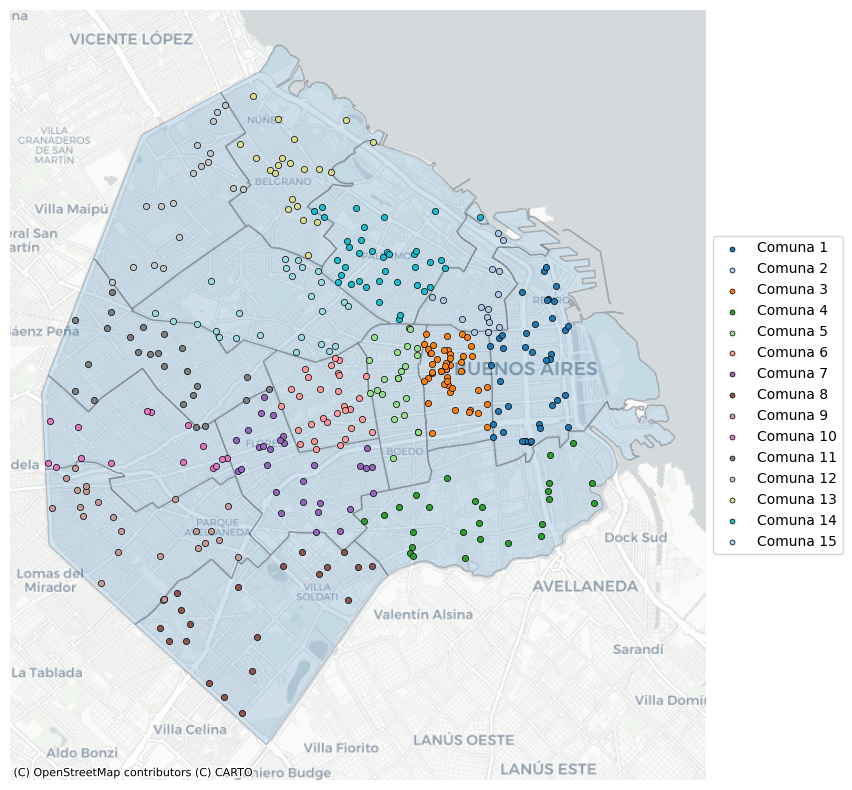

In [ ]:
# Plot with basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the shapes (comunas) with the basemap
comunas_gpd.plot(ax=ax, alpha=0.2, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)


# Plot the points with different colors based on 'Tipo'
for comuna, color in color_comuna.items():
    points_comuna = gdf[gdf['comuna_new'] == comuna]
    points_comuna.plot(ax=ax, color=color, marker='o', edgecolor='black', linewidth=0.5, markersize=20, label= "Comuna "+str(comuna))
    #ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=points_comuna.crs)

#ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=gdf.crs)

ax.set_axis_off()

ax.legend(
    fontsize='medium',          # Reduce font size
    markerscale=0.8,           # Adjust marker size
    loc='center left',         # Position legend outside the plot
    bbox_to_anchor=(1, 0.5)    # Place legend to the right of the plot
)
plt.show()
